In [2]:
# Importation des principales librairies pour réutiliser des fonctionnalités de ces librairies.
# 1-1- Library

import pandas as pd
import numpy as np
import tabulate

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

#7.1- Formulation des modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_auc_score 

# 1-2- Paramétrage (optionnelle)
# warnings.simplefilter permet d'ignorer des warnings inutiles (exemple : la fonction subplots affiche un warning inutile)
import warnings
warnings.simplefilter("ignore")

# 1-3- Variables d'aides

class color:
    PURPLE = "\033[95m"
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
# Data loading
# 2.1- Importation des données

dataset = pd.read_excel("DATABASE_PROJECT_4_VF.xlsx")

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      1340 non-null   object 
 1   X1      1329 non-null   float64
 2   X2      1340 non-null   float64
 3   X3      1340 non-null   float64
 4   X4      1340 non-null   float64
 5   X5      1340 non-null   float64
 6   X6      1340 non-null   float64
 7   X7      1340 non-null   float64
 8   X8      1340 non-null   float64
 9   X9      1340 non-null   int64  
 10  X10     1340 non-null   float64
 11  X11     1340 non-null   float64
 12  X12     1340 non-null   float64
 13  X13     1340 non-null   float64
 14  X14     1340 non-null   float64
 15  X15     1340 non-null   float64
 16  X16     1340 non-null   float64
 17  X17     1340 non-null   float64
 18  X18     1340 non-null   float64
 19  X19     1340 non-null   float64
 20  Y       1340 non-null   int64  
dtypes: float64(18), int64(2), object(1)
m

In [5]:
# set_index permet de dire à Python que l'identifiant de la table dataset est la colonne Id
# Ainsi, la colonne Id ne sera pas utilisée dans la construction des modèles, 
# i.e., Id ne sera pas la variable Y et ne fera pas des X.

dataset.set_index("Id", inplace=True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1340 entries, Brandon Ingram to Jon Barry
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1329 non-null   float64
 1   X2      1340 non-null   float64
 2   X3      1340 non-null   float64
 3   X4      1340 non-null   float64
 4   X5      1340 non-null   float64
 5   X6      1340 non-null   float64
 6   X7      1340 non-null   float64
 7   X8      1340 non-null   float64
 8   X9      1340 non-null   int64  
 9   X10     1340 non-null   float64
 10  X11     1340 non-null   float64
 11  X12     1340 non-null   float64
 12  X13     1340 non-null   float64
 13  X14     1340 non-null   float64
 14  X15     1340 non-null   float64
 15  X16     1340 non-null   float64
 16  X17     1340 non-null   float64
 17  X18     1340 non-null   float64
 18  X19     1340 non-null   float64
 19  Y       1340 non-null   int64  
dtypes: float64(18), int64(2)
memory usage: 219.8+ KB


In [7]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
Id,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,25.0,27.4,7.4,2.3,2.6,34.7,0.5,2.1,36,7.6,1.6,69.9,0.4,4.1,0.7,3.4,1.9,1.3,0.4,0
Andrew Harrison,23.5,26.9,7.2,3.4,2.0,29.6,0.7,2.8,35,6.7,2.6,76.5,1.1,2.4,0.5,2.0,3.7,1.6,0.5,0
JaKarr Sampson,24.4,15.3,5.2,1.3,2.0,42.2,0.4,1.7,74,4.7,0.9,67.0,0.5,2.2,0.5,1.7,1.0,1.0,0.3,0
Malik Sealy,22.6,11.6,5.7,1.3,2.3,42.6,0.1,0.5,58,5.5,0.9,68.9,0.6,1.9,1.0,0.9,0.8,1.0,0.1,1
Matt Geiger,0.0,11.5,4.5,1.9,1.6,52.4,0.0,0.1,48,3.0,1.3,67.4,0.3,2.5,1.0,1.5,0.3,0.8,0.4,1


In [8]:
# Datasplitting

# 3.1 - Division de dataset en train (db_train) et test (db_test)

from sklearn.model_selection import train_test_split

db_train, db_test = train_test_split(dataset, train_size = 500,  random_state=60)   

In [9]:
# 3.2 - Information sur la base train et test

# Base train : nombre de lignes et de colonnnes
print(color.BOLD + "Base d'apprentissage" + color.END)
print(db_train.shape)

# Base test : nombre de lignes et de colonnnes
print(color.BOLD + "\nBase de test" + color.END)
print(db_test.shape)

Base d'apprentissage
(500, 20)

Base de test
(840, 20)


In [10]:
# la base d'apprentissage est donc composé de 500 individus et la base test est elle composée de 840 individus

In [11]:
# Analyse exploratoire des données
# 4.1 - Caclul des 5 ans de carrière ou non : base train et test

print(color.BOLD + '5_ans_de_carriere : Base Train' + color.END)

pd.crosstab(index=db_train["Y"], columns="count", normalize='all') 

5_ans_de_carriere : Base Train


col_0,count
Y,
0,0.382
1,0.618


In [12]:
print(color.BOLD + '5_ans_de_carriere: Base Test' + color.END)

pd.crosstab(index=db_test["Y"], columns="count", normalize='all') 

5_ans_de_carriere: Base Test


col_0,count
Y,
0,0.378571
1,0.621429


In [13]:
# 4.2 - Statistiques : base train

db_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
count,498.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,20.042369,17.217400,6.740200,1.794200,2.609200,43.876800,0.238800,0.747800,60.510000,5.86060,1.286800,70.562400,0.617600,2.893600,0.966400,1.930000,1.571800,1.184600,0.325400,0.618000
std,15.646024,8.409204,4.510029,1.330325,1.754889,5.746717,0.367321,0.985941,17.522899,3.73488,0.989152,10.711266,0.410789,2.003854,0.757958,1.325509,1.478485,0.742837,0.375575,0.486363
min,0.000000,4.200000,0.900000,0.100000,0.300000,23.800000,0.000000,0.000000,11.000000,0.80000,0.100000,28.600000,0.000000,0.300000,0.000000,0.200000,0.000000,0.100000,0.000000,0.000000
25%,0.000000,10.500000,3.475000,0.900000,1.300000,40.200000,0.000000,0.000000,47.000000,3.20000,0.600000,64.850000,0.300000,1.400000,0.400000,1.000000,0.600000,0.700000,0.100000,0.000000
50%,24.000000,15.800000,5.300000,1.450000,2.100000,43.700000,0.100000,0.300000,63.000000,4.70000,1.000000,71.900000,0.500000,2.300000,0.800000,1.600000,1.100000,1.000000,0.200000,1.000000
75%,32.800000,22.500000,8.425000,2.300000,3.300000,47.400000,0.325000,1.100000,77.000000,7.40000,1.700000,78.300000,0.800000,3.900000,1.300000,2.500000,2.000000,1.525000,0.400000,1.000000
max,100.000000,40.900000,23.700000,8.500000,9.800000,66.200000,2.100000,5.100000,82.000000,19.70000,5.700000,100.000000,2.500000,12.100000,4.300000,8.800000,9.300000,4.200000,3.400000,1.000000


In [14]:
# Nous retrouvons ici les statistiques de la bases train avec par exemple : 
# une moyenne de 17 minutes jouées (X2) et une moyenne de 69 matches (X9) 

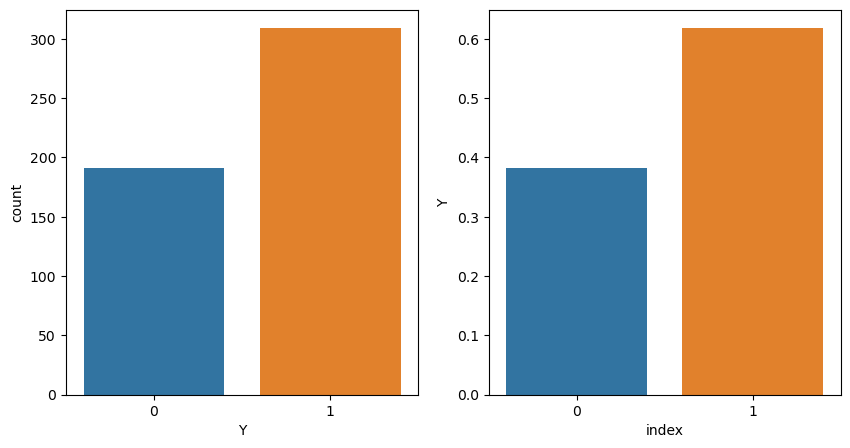

In [15]:
# 4.3 - variable à expliquer : 5_ans_de_carriere?

plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
sns.countplot(data = db_train, x = 'Y')

plt.subplot(1,2,2)
prop_df = (db_train['Y']
           .value_counts(normalize=True)
           .reset_index())

sns.barplot(x='index', y='Y', data=prop_df)

plt.show()

In [16]:
# Nous pouvons voir dans la base train, qu'il y a plus de joueurs (310/500) qui ont plus de 5 ans de carrière
# ce qui donne une probabilité d'avoir une carrière de + de 5 ans de 52%.
# Cette représentation graphique représente les différents éléments statistiques vue auparavant.  

In [17]:
# Data Treatment

# Nous allons par la suite traiter la donnée pour avoir une base de donnée propre avant la modélisation ainsi dans un premier temps
# Nous avons identifié puis traité les valeurs manquantes


In [18]:
# 5.1 - Base train : Missing values

# Comptabilisation des valeurs manquantes -> Nous identifiants 2 valeurs manquantes pour la variable X1 ici

db_train_na = db_train.isnull().sum()

print(db_train_na.sort_values(ascending=False))

X1     2
X2     0
X19    0
X18    0
X17    0
X16    0
X15    0
X14    0
X13    0
X12    0
X11    0
X10    0
X9     0
X8     0
X7     0
X6     0
X5     0
X4     0
X3     0
Y      0
dtype: int64


In [19]:
# Remplacement des valeurs manquantes 
# mode = valeur la plus fréquente
# mean = pour valeur quantitative

# na_values contient les valeurs les plus fréquentes. 
# Ces valeurs plus fréquents seront utilisées pour remplacer les valeurs manquantes.

na_values = {
'X1': db_train["X1"].mode()[0]}


# Remplissage des valeurs manquantes.
db_train = db_train.fillna(value=na_values)

In [20]:
# Comptabilisation des valeurs manquantes

db_train.isnull().sum().sort_values(ascending=False)

# Conclusion : il n'y a plus de valeurs manquantes dans les données d'apprentissage (base train).

X1     0
X2     0
X19    0
X18    0
X17    0
X16    0
X15    0
X14    0
X13    0
X12    0
X11    0
X10    0
X9     0
X8     0
X7     0
X6     0
X5     0
X4     0
X3     0
Y      0
dtype: int64

In [21]:
# Data Treatment

# 5.1 - Base Test : Missing values

# Comptabilisation des valeurs manquantes -> Nous identifions 9 valeurs manquantes pour la variable X1 ici
db_test_na = db_test.isnull().sum()

print(db_test_na.sort_values(ascending=False))

X1     9
X2     0
X19    0
X18    0
X17    0
X16    0
X15    0
X14    0
X13    0
X12    0
X11    0
X10    0
X9     0
X8     0
X7     0
X6     0
X5     0
X4     0
X3     0
Y      0
dtype: int64


In [22]:
# Remplacement des valeurs manquantes 
# mode = valeur la plus fréquente
# mean = pour valeur quantitative

# na_values contient les valeurs les plus fréquentes. 
# Ces valeurs plus fréquents seront utilisées pour remplacer les valeurs manquantes.
na_values = {
'X1': db_test["X1"].mode()[0]}


# Remplissage des valeurs manquantes.
db_test = db_test.fillna(value=na_values)

In [23]:
# Comptabilisation des valeurs manquantes

db_test.isnull().sum().sort_values(ascending=False)

# Conclusion : il n'y a plus de valeurs manquantes dans les bases train et test

X1     0
X2     0
X19    0
X18    0
X17    0
X16    0
X15    0
X14    0
X13    0
X12    0
X11    0
X10    0
X9     0
X8     0
X7     0
X6     0
X5     0
X4     0
X3     0
Y      0
dtype: int64

In [24]:
# Data treatment : Standardisation des données 

# 1. liste des variables numériques 

#Ce code permet de déterminer les variables quantitives.
db_train_numericals_columns = dataset.select_dtypes('number')

#Affichage de la variable : db_train_numericals_columns
print(db_train_numericals_columns)

                   X1    X2   X3   X4   X5    X6   X7   X8  X9  X10  X11  \
Id                                                                         
Brandon Ingram   25.0  27.4  7.4  2.3  2.6  34.7  0.5  2.1  36  7.6  1.6   
Andrew Harrison  23.5  26.9  7.2  3.4  2.0  29.6  0.7  2.8  35  6.7  2.6   
JaKarr Sampson   24.4  15.3  5.2  1.3  2.0  42.2  0.4  1.7  74  4.7  0.9   
Malik Sealy      22.6  11.6  5.7  1.3  2.3  42.6  0.1  0.5  58  5.5  0.9   
Matt Geiger       0.0  11.5  4.5  1.9  1.6  52.4  0.0  0.1  48  3.0  1.3   
...               ...   ...  ...  ...  ...   ...  ...  ...  ..  ...  ...   
Chris Smith      14.3  15.8  4.3  1.5  1.6  43.3  0.0  0.2  80  3.6  1.2   
Brent Price      16.7  12.6  3.9  1.0  1.5  35.8  0.1  0.7  68  4.1  0.8   
Marlon Maxey      0.0  12.1  5.4  1.6  2.2  55.0  0.0  0.0  43  3.9  1.0   
Litterial Green  10.0  12.0  4.5  1.8  1.7  43.9  0.0  0.2  52  3.8  1.2   
Jon Barry        33.3  11.7  4.4  1.0  1.6  36.9  0.4  1.3  47  4.4  0.7   

           

In [25]:
#Détermination des variables numériques
numericals_features = db_train_numericals_columns.columns
numericals_features

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'Y'],
      dtype='object')

In [26]:
# Nous remarquons que la base est dotée uniquement de valeurs numériques

In [27]:
# Standardisation de la base train 

# But du code : la méthode MinMaxScaler est une technique de standardisation de sklearn.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Standardisation de la base train
db_train[numericals_features]  = scaler.fit_transform(db_train[numericals_features].to_numpy())

# Affichage des 2 premières lignes de la base train
db_train.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
Id,,,,,,,,,,,,,,,,,,,,
Mark Alarie,0.222,0.356948,0.307018,0.178571,0.326316,0.594340,0.00000,0.019608,0.746479,0.322751,0.160714,0.528011,0.12,0.254237,0.255814,0.232558,0.129032,0.195122,0.117647,1.0
Josh Richardson,0.461,0.465940,0.250000,0.130952,0.221053,0.504717,0.47619,0.431373,0.577465,0.232804,0.125000,0.533613,0.28,0.152542,0.093023,0.174419,0.150538,0.146341,0.147059,0.0


In [28]:
db_train

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,Y
Id,,,,,,,,,,,,,,,,,,,,
Mark Alarie,0.222,0.356948,0.307018,0.178571,0.326316,0.594340,0.000000,0.019608,0.746479,0.322751,0.160714,0.528011,0.12,0.254237,0.255814,0.232558,0.129032,0.195122,0.117647,1.0
Josh Richardson,0.461,0.465940,0.250000,0.130952,0.221053,0.504717,0.476190,0.431373,0.577465,0.232804,0.125000,0.533613,0.28,0.152542,0.093023,0.174419,0.150538,0.146341,0.147059,0.0
Bobby Jones,0.111,0.092643,0.070175,0.095238,0.073684,0.528302,0.000000,0.039216,0.464789,0.068783,0.071429,0.385154,0.12,0.084746,0.116279,0.069767,0.043011,0.073171,0.000000,0.0
Jay Vincent,0.250,0.768392,0.899123,0.583333,0.905263,0.610849,0.000000,0.000000,0.985915,0.904762,0.625000,0.602241,0.44,0.567797,0.511628,0.523256,0.236559,0.560976,0.088235,1.0
D.J. Augustin,0.439,0.607629,0.478070,0.369048,0.357895,0.452830,0.714286,0.666667,0.859155,0.412698,0.500000,0.850140,0.24,0.127119,0.046512,0.162791,0.376344,0.365854,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dee Brown,0.206,0.531335,0.342105,0.214286,0.336842,0.533019,0.047619,0.078431,1.000000,0.354497,0.285714,0.822129,0.40,0.161017,0.116279,0.174419,0.451613,0.390244,0.058824,1.0
Greg Foster,0.000,0.190736,0.153509,0.119048,0.157895,0.523585,0.000000,0.019608,0.605634,0.164021,0.125000,0.564426,0.08,0.211864,0.232558,0.186047,0.075269,0.170732,0.117647,1.0
Rick Carlisle,0.000,0.013624,0.039474,0.035714,0.042105,0.353774,0.000000,0.019608,0.380282,0.052910,0.053571,0.834734,0.04,0.025424,0.046512,0.011628,0.075269,0.097561,0.000000,1.0


In [29]:
# Identification de X et Y 

# target contient le nom de la variable Y
target = 'Y'
print(color.BOLD + "--------Contenu de la variable : target--------" + color.END)
print(target)


# features contient les noms des variables X
features = list(set(db_train.columns) - set(target.split()))
print(color.BOLD + "\n--------Contenu de la variable : features--------" + color.END)
print(features)

--------Contenu de la variable : target--------
Y

--------Contenu de la variable : features--------
['X16', 'X14', 'X12', 'X10', 'X13', 'X15', 'X19', 'X3', 'X18', 'X2', 'X8', 'X17', 'X11', 'X6', 'X5', 'X4', 'X9', 'X1', 'X7']


In [30]:
# y_train contient les données de Y sur la base train
y_train = db_train[target]
print(color.BOLD + "\n--------Contenu de la variable : y_train--------" + color.END)
print(y_train.head())

# NB : db_train[target] est égale à y_train. Ainsi, db_train[target] peut être utilisé à la place de y_train et vice versa.


--------Contenu de la variable : y_train--------
Id
Mark Alarie        1.0
Josh Richardson    0.0
Bobby Jones        0.0
Jay Vincent        1.0
D.J. Augustin      1.0
Name: Y, dtype: float64


In [31]:
# x_train contient les données de Y
x_train = db_train[features]

# NB : db_train[features] est égale à x_train. 
# Ainsi, db_train[features] peut être utilisé à la place de x_train et vice versa.

In [32]:
x_train

,X16,X14,X12,X10,X13,X15,X19,X3,X18,X2,X8,X17,X11,X6,X5,X4,X9,X1,X7
Id,,,,,,,,,,,,,,,,,,,
Mark Alarie,0.232558,0.254237,0.528011,0.322751,0.12,0.255814,0.117647,0.307018,0.195122,0.356948,0.019608,0.129032,0.160714,0.594340,0.326316,0.178571,0.746479,0.222,0.000000
Josh Richardson,0.174419,0.152542,0.533613,0.232804,0.28,0.093023,0.147059,0.250000,0.146341,0.465940,0.431373,0.150538,0.125000,0.504717,0.221053,0.130952,0.577465,0.461,0.476190
Bobby Jones,0.069767,0.084746,0.385154,0.068783,0.12,0.116279,0.000000,0.070175,0.073171,0.092643,0.039216,0.043011,0.071429,0.528302,0.073684,0.095238,0.464789,0.111,0.000000
Jay Vincent,0.523256,0.567797,0.602241,0.904762,0.44,0.511628,0.088235,0.899123,0.560976,0.768392,0.000000,0.236559,0.625000,0.610849,0.905263,0.583333,0.985915,0.250,0.000000
D.J. Augustin,0.162791,0.127119,0.850140,0.412698,0.24,0.046512,0.000000,0.478070,0.365854,0.607629,0.666667,0.376344,0.500000,0.452830,0.357895,0.369048,0.859155,0.439,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dee Brown,0.174419,0.161017,0.822129,0.354497,0.40,0.116279,0.058824,0.342105,0.390244,0.531335,0.078431,0.451613,0.285714,0.533019,0.336842,0.214286,1.000000,0.206,0.047619
Greg Foster,0.186047,0.211864,0.564426,0.164021,0.08,0.232558,0.117647,0.153509,0.170732,0.190736,0.019608,0.075269,0.125000,0.523585,0.157895,0.119048,0.605634,0.000,0.000000
Rick Carlisle,0.011628,0.025424,0.834734,0.052910,0.04,0.046512,0.000000,0.039474,0.097561,0.013624,0.019608,0.075269,0.053571,0.353774,0.042105,0.035714,0.380282,0.000,0.000000


In [33]:
# y_test contient les données de Y sur la base test
y_test = db_test[target]


# x_test contient les données de Y
x_test = db_test[features]

In [34]:
y_test

Id
Ronald Dupree        1
Tony Dumas           0
Corey Brewer         1
Sidney Green         1
Chris Paul           1
                    ..
Michael Cage         1
Sylvester Gray       0
Andrew Bynum         1
Darnell Jackson      0
Patrick Patterson    1
Name: Y, Length: 840, dtype: int64

In [35]:
x_test

,X16,X14,X12,X10,X13,X15,X19,X3,X18,X2,X8,X17,X11,X6,X5,X4,X9,X1,X7
Id,,,,,,,,,,,,,,,,,,,
Ronald Dupree,2.4,3.6,62.9,6.0,0.7,1.2,0.4,6.2,1.1,19.0,0.2,1.2,1.4,39.4,2.4,2.2,47,44.4,0.1
Tony Dumas,0.5,1.1,64.9,4.3,0.2,0.6,0.1,4.6,0.9,10.6,1.3,1.0,0.9,38.4,1.7,1.3,58,30.1,0.4
Corey Brewer,2.7,3.7,80.0,6.2,1.0,1.0,0.3,5.8,1.1,22.8,0.5,1.4,1.1,37.4,2.3,1.4,79,19.4,0.1
Sidney Green,2.4,3.6,71.4,4.7,0.4,1.2,0.3,5.2,1.2,13.6,0.0,0.5,1.1,43.9,2.0,1.6,49,0.0,0.0
Chris Paul,4.3,5.1,84.7,12.1,2.2,0.8,0.1,16.1,2.4,36.0,2.3,7.8,5.1,43.0,5.2,6.0,78,28.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Michael Cage,3.5,5.2,73.7,5.3,0.6,1.7,0.4,7.1,1.1,21.5,0.0,0.7,1.3,54.3,2.9,1.8,75,0.0,0.0
Sylvester Gray,3.1,5.2,67.3,7.2,0.7,2.1,0.5,8.0,1.9,22.2,0.1,2.1,1.9,42.0,3.0,2.8,55,25.0,0.0
Andrew Bynum,1.0,1.7,29.6,1.8,0.1,0.7,0.5,1.6,0.4,7.3,0.0,0.2,0.2,40.2,0.7,0.6,46,0.0,0.0


In [36]:
# Mesure de la performance d'un modèle 

from sklearn import metrics

def performance_modele(modele_name, modele, dataset_name, x_dataset, y_dataset) :

    # MESSAGE D'AFFICHAGE
    print(color.BOLD + "\n===============================[EVALUATION DU MODELE : " + modele_name + " SUR LE DATASET : " + dataset_name + "]===============================")
    
    #0- PREDICTION DU MODÈLE
    y_pred = modele.predict(x_dataset)

    #1- MATRICE DE CONFUSION
    cm_logit = metrics.confusion_matrix(y_dataset,y_pred)
    print("1. MATRICE DE CONFUSION :" )
    print(cm_logit)

    #2- TAUX D'ERREUR DE CLASSEMENT
    #a- Taux de succès
    as_modele = metrics.accuracy_score(y_true = y_dataset, y_pred = y_pred)
    print("\n2-1. ACCURACY SCORE : {:.0%}".format(as_modele))
   
    #b- Taux d'erreur de classement
    err = 1.0 - as_modele
    print("\n2-2. TAUX D'ERREUR : {:.0%}".format(err))

    # Le taux de précision (valeur en décimale)
    precision = sklearn.metrics.precision_score(y_dataset,y_pred)
    print("\n2-2. TAUX DE PRECISION: {:.0%}".format(precision))
    
    #4-AUC DU MODÈLE
    y_proba_pred = modele.predict_proba(x_dataset)[:, 1]
    
    #### B- Calcul des faux positifs et des vrais positifs
    fpr, tpr, threshold = sklearn.metrics.roc_curve(y_dataset, y_proba_pred, pos_label=1)

    #AUC
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    print("\n3. AUC : {:.0%}".format(roc_auc))
    
    #RESULTAT DE LA FONCTION
    print(color.BOLD + "===============================[FIN EVALUATION DU MODELE : " + modele_name + " SUR LE DATASET : " + dataset_name + "]==============================="+color.END)
    
    return roc_auc, fpr, tpr




In [37]:
# Definition du modele logsitique 

logistic_model = LogisticRegression(solver='liblinear')

In [38]:
logistic_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [39]:
## 7.3- Affichage des coefficient

# Coefficient de  X0
constante_coeff = pd.DataFrame({"Feature":['constante'],"Coefficients":logistic_model.intercept_[0]})

# Coefficient de  X
x_coeff = pd.DataFrame({"Feature":features,"Coefficients":logistic_model.coef_[0]})

coefficient = pd.concat([constante_coeff,x_coeff])
coefficient.head(2)

,Feature,Coefficients
0,constante,-2.137636
0,X16,-0.332630


In [40]:
roc_auc_logit_train, fpr_logit_train, tpr_logit_train = performance_modele( modele_name = "Logistique",      
                                                                         modele = logistic_model, 
                                                                         dataset_name = "Train",
                                                                         x_dataset = x_train, 
                                                                         y_dataset = y_train)


===============================[EVALUATION DU MODELE : Logistique SUR LE DATASET : Train]===============================
1. MATRICE DE CONFUSION :
[[ 99  92]
 [ 44 265]]

2-1. ACCURACY SCORE : 73%

2-2. TAUX D'ERREUR : 27%

2-2. TAUX DE PRECISION: 74%

3. AUC : 77%
===============================[FIN EVALUATION DU MODELE : Logistique SUR LE DATASET : Train]===============================


In [41]:
# Tout d'abord d'après la matrice de confusion nous remarquons qu'il y a parmi les 5OO individus de la base test, il y a :
# 99 vrais positifs 
# 44 faux positifs
# 92 faux négatifs
# 265 vrais négatifs

# Ce qui fait que pour ce modèle Logistique, il y a 73% des individus dont on a bien déterminé le Y dans les 500 personnes de l'échantillons
# avec une marge d'erreur de 27% qu'on arrivera pas à déterminer et qui correspond à (92+44 / 500)

# Ainsi le modèle Logistique est fiable à 77% ce qui est bon car le minimium doit être de 70%

In [42]:
roc_auc_logit_test, fpr_logit_test, tpr_logit_test = performance_modele( modele_name = "Logistique",      
                                                                         modele = logistic_model, 
                                                                         dataset_name = "Test",
                                                                         x_dataset = x_test, 
                                                                         y_dataset = y_test)    


===============================[EVALUATION DU MODELE : Logistique SUR LE DATASET : Test]===============================
1. MATRICE DE CONFUSION :
[[  0 318]
 [  0 522]]

2-1. ACCURACY SCORE : 62%

2-2. TAUX D'ERREUR : 38%

2-2. TAUX DE PRECISION: 62%

3. AUC : 50%
===============================[FIN EVALUATION DU MODELE : Logistique SUR LE DATASET : Test]===============================


In [43]:
# 0 vrais positifs 
# 0 faux positifs
# 318 faux négatifs
# 522 vrais négatifs


# On remarque que pour la base test, il y a un taux d'erreur de 38% (318/522) et qui est donc plus élevé de 11% que la base train
# de plus le modèle est fiable à 50% ce qui est inférieur à l'apprentissage de 27%
# et surtout on est donc à moins de 70% ce qui fait que le modèle ici ne sera pas acceptable.

In [44]:
#Formulation du modèle
rf_modele = RandomForestClassifier()

In [45]:
hyperparameter_rf = {
# Possibilité de changer les paramètres pour voir si le modèle change ou pas !!!!
    
#class_weight : attribue un poids explicite à chaque valeur de la variable Y dans la construction du modèle (correction du problème de désquilibre de la base).
'class_weight': 'balanced',
    
#criterion  : critère de performance du modèle utilisé.  
'criterion': 'gini',
    
#max_depth : la taille ou la profondeur maximale des arbres agrégés.    
'max_depth': 11,
    
# max_features : Nombre de variables à tirer au sort pour construire les arbres agrégés à chaque itération.    
'max_features': 'sqrt',
    
 
# min_samples_leaf: Nombre minimum d'observations dans une feuille des arbres agrégés.
'min_samples_leaf': 0.08006146989323783,
    
# min_samples_split : Nombre minimum d'observation requis pour diviser un nœud. Il peut être exprimer en fraction du nombre total d'observations.
'min_samples_split': 0.15794570681082104,
    
#n_estimators : le nombre d'arbres agrégés.  -> paramètre le + important
'n_estimators': 10000,
    
  
#random_state : permet d'avoir des résultats reproductibles.
'random_state' : 10
}

In [46]:
# Affectation des paramètres.
rf_modele.set_params(**hyperparameter_rf)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       min_samples_leaf=0.08006146989323783,
                       min_samples_split=0.15794570681082104,
                       n_estimators=10000, random_state=10)

In [47]:
rf_modele.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=11,
                       min_samples_leaf=0.08006146989323783,
                       min_samples_split=0.15794570681082104,
                       n_estimators=10000, random_state=10)

In [48]:
roc_auc_rf_train, fpr_rf_train, tpr_rf_train = performance_modele( modele_name = 'rf_modele',      
                                                                         modele = rf_modele, 
                                                                         dataset_name = 'train',
                                                                         x_dataset = x_train, 
                                                                         y_dataset = y_train)


===============================[EVALUATION DU MODELE : rf_modele SUR LE DATASET : train]===============================
1. MATRICE DE CONFUSION :
[[142  49]
 [ 98 211]]

2-1. ACCURACY SCORE : 71%

2-2. TAUX D'ERREUR : 29%

2-2. TAUX DE PRECISION: 81%

3. AUC : 79%
===============================[FIN EVALUATION DU MODELE : rf_modele SUR LE DATASET : train]===============================


In [49]:
# Tout d'abord d'après la matrice de confusion nous remarquons qu'il y a parmi les 5OO individus de la base test, il y a :
# 142 vrais positifs 
# 98 faux positifs
# 49 faux négatifs
# 211 vrais négatifs

# Ce qui fait que pour ce modèle Random Forest, il y a 71% des individus dont on a bien déterminé le Y dans les 500 personnes de l'échantillons
# avec une marge d'erreur de 29% qu'on arrivera pas à déterminer et qui correspond à (98+49 / 500)

# Ainsi le modèle Random Forest est fiable pour la base train à 78% ce qui est bon car le minimium doit être de 70%

In [50]:
roc_auc_rf_test, fpr_rf_test, tpr_rf_test = performance_modele( modele_name = 'rf_modele',      
                                                                         modele = rf_modele, 
                                                                         dataset_name = 'test',
                                                                         x_dataset = x_test, 
                                                                         y_dataset = y_test)


===============================[EVALUATION DU MODELE : rf_modele SUR LE DATASET : test]===============================
1. MATRICE DE CONFUSION :
[[  0 318]
 [  0 522]]

2-1. ACCURACY SCORE : 62%

2-2. TAUX D'ERREUR : 38%

2-2. TAUX DE PRECISION: 62%

3. AUC : 63%
===============================[FIN EVALUATION DU MODELE : rf_modele SUR LE DATASET : test]===============================


In [51]:
# Le taux d'erreur est plus conséquent pour le test 38% que pour le train , +9% de taux d'erreur
# de plus le modèle est fiable à 62% ce qui est inférieur à l'apprentissage
# et surtout on est donc à moins de 70% ce qui fait que le modèle ici ne sera pas acceptable.

In [52]:
#get_reproducible_results()
svm_modele = svm.SVC(probability=True)

In [53]:
hyperparameter_svm = {
# C : Coût d'erreur de classification ou la marge de tolérance du modèle relative aux erreurs de classification. 
# Lorsque nous augmentons la valeur C, la marge diminue. Ainsi, les modèles avec des valeurs de C faibles ont tendance à être plus généralisés.    
'C': 30,
    
# kernel : Type de noyau utilisé. Lorsque le SVM n'est pas performant, un autre noyau pourra être utilisé pour projéter les données dans une nouvelle dimension ou nouvel espace.   
'kernel': 'linear',
    
   
# gamma : hyperparamètre utilisé avec SVM non linéaire. De faibles valeurs de gamma indiquent un grand rayon de similarité qui se traduit par le regroupement de plus de points. 
# Pour des valeurs élevées de gamma, les points doivent être très proches les uns des autres afin d'être considérés dans le même groupe (ou classe). 
# Par conséquent, les modèles avec des valeurs gamma très élevées ont tendance à se sur-ajuster.
'gamma' : 7,
    
#random_state : permet d'avoir des résultats reproductibles.    
'random_state' : 10
}

In [54]:
# Affectation des paramètres
svm_modele.set_params(**hyperparameter_svm)

SVC(C=30, gamma=7, kernel='linear', probability=True, random_state=10)

In [55]:
svm_modele.fit(x_train,y_train)

SVC(C=30, gamma=7, kernel='linear', probability=True, random_state=10)

In [56]:
roc_auc_svm_train, fpr_svm_train, tpr_svm_train = performance_modele( modele_name = 'svm_modele',      
                                                                         modele = svm_modele, 
                                                                         dataset_name = 'TRAIN',
                                                                         x_dataset = x_train, 
                                                                         y_dataset = y_train)


===============================[EVALUATION DU MODELE : svm_modele SUR LE DATASET : TRAIN]===============================
1. MATRICE DE CONFUSION :
[[106  85]
 [ 50 259]]

2-1. ACCURACY SCORE : 73%

2-2. TAUX D'ERREUR : 27%

2-2. TAUX DE PRECISION: 75%

3. AUC : 78%
===============================[FIN EVALUATION DU MODELE : svm_modele SUR LE DATASET : TRAIN]===============================


In [57]:
# Tout d'abord d'après la matrice de confusion nous remarquons qu'il y a parmi les 5OO individus de la base test, il y a :
# 106 vrais positifs 
# 50 faux positifs
# 85 faux négatifs
# 259 vrais négatifs

# Ce qui fait que pour ce modèle SVM, il y a 73% des individus dont on a bien déterminé le Y dans les 500 personnes de l'échantillons
# avec une marge d'erreur de 27% qu'on arrivera pas à déterminer et qui correspond à (50+85 / 500)

# Ainsi le svm est fiable pour la base train à 78% ce qui est bon car le minimium doit être de 70%


In [58]:
roc_auc_svm_test, fpr_svm_test, tpr_svm_test = performance_modele( modele_name = 'svm_modele',      
                                                                         modele = svm_modele, 
                                                                         dataset_name = 'TEST',
                                                                         x_dataset = x_test, 
                                                                         y_dataset = y_test)


===============================[EVALUATION DU MODELE : svm_modele SUR LE DATASET : TEST]===============================
1. MATRICE DE CONFUSION :
[[  0 318]
 [  0 522]]

2-1. ACCURACY SCORE : 62%

2-2. TAUX D'ERREUR : 38%

2-2. TAUX DE PRECISION: 62%

3. AUC : 50%
===============================[FIN EVALUATION DU MODELE : svm_modele SUR LE DATASET : TEST]===============================


In [59]:
# Le taux d'erreur est plus conséquent pour le test 38% que pour le train , +9% de taux d'erreur
# de plus le modèle est fiable à 62% ce qui est inférieur à l'apprentissage
# et surtout pour la base test le modèle svm est fiable à 50%
# on est donc à moins de 70% ce qui fait que le modèle ici ne sera pas acceptable.

In [60]:
# ARBRES DE DÉCISIONS

tree_modele = tree.DecisionTreeClassifier(random_state=0,
min_samples_leaf = 0.06, #min_samples_leaf : nombre d'observation dans les feuilles.
class_weight = 'balanced') #résoudre le problème de deséquilibre de la base.

In [61]:
tree_modele.fit(db_train[features],db_train[target])

DecisionTreeClassifier(class_weight='balanced', min_samples_leaf=0.06,
                       random_state=0)

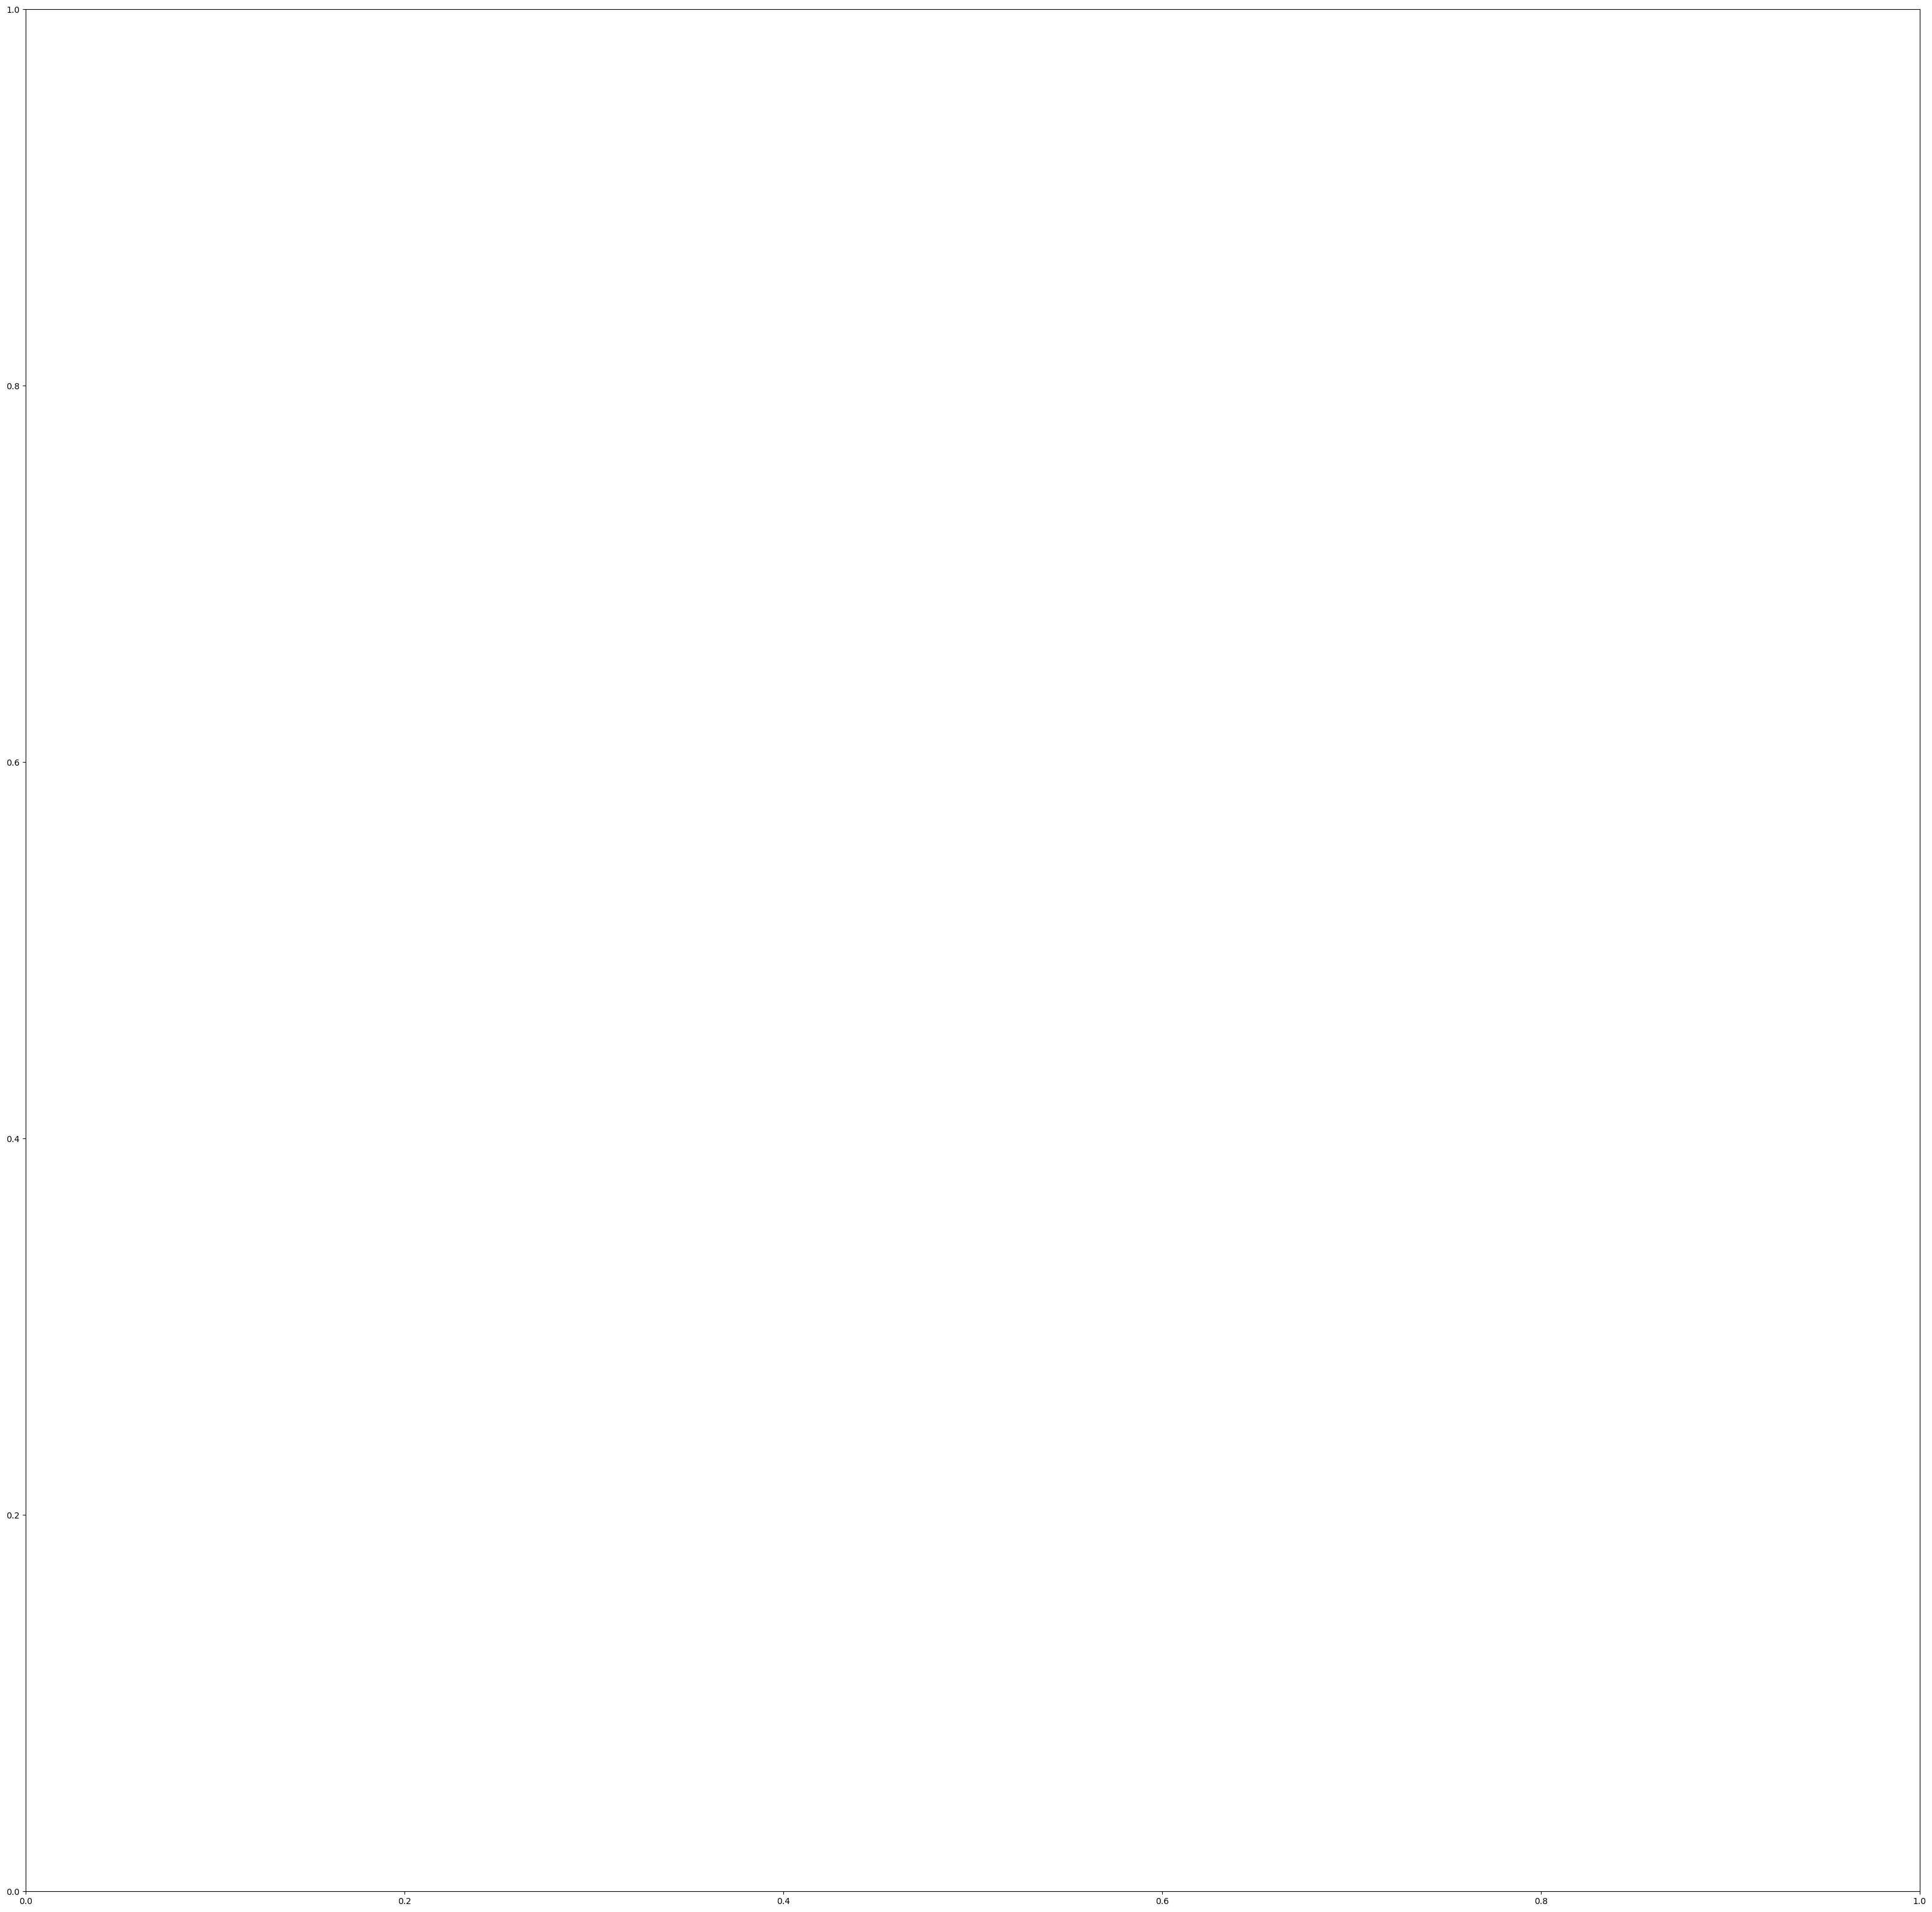

In [62]:
fig, ax = plt.subplots(figsize=(40, 40))

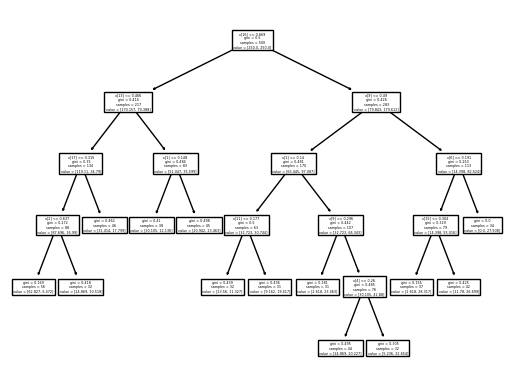

In [63]:
out = tree.plot_tree(tree_modele)

In [64]:
for o in out:
    arrow = o.arrow_patch 
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)

In [65]:
fig.savefig("decision_tree.png")

In [66]:
#AFFICHAGE DU GRAPHIQUE
plt.show()

In [67]:
# Base train : Mesure de la performance du modèle des arbres de décision
# A- Prediction du modèle : Application du modèle (arbre de décision) sur la base train (base d'apprentissage)

#Prédiction du modèle
y_pred_tree_train = tree_modele.predict(db_train[features])

#Affichage de quelques lingnes de la prédiction du modèle
y_pred_tree_train[0:10]

array([0., 1., 0., 1., 1., 0., 1., 0., 1., 1.])

In [68]:
# Conclusion : y_pred_tree_train ne contient que des 0 ou 1 qui correspondent aux modalités de la variable Y.

In [69]:
# B- Matric de confusion : (base : train, modèle : arbre de décision)

#confrontation entre Y observé et Y obtenu par le modèle sur la base train.

cm_tree_train = metrics.confusion_matrix(y_train,y_pred_tree_train) 
cm_tree_train

array([[151,  40],
       [ 97, 212]])

In [70]:
# C- Taux d'erreur de classement : (base : train, modèle : arbre de décision)

from sklearn.metrics import accuracy_score

#taux de bien classés : clients bien identifés par le modèle.
as_tree_train = metrics.accuracy_score(y_true = y_train, y_pred = y_pred_tree_train) 
print("Accuracy Score (taux de succès) de la base train : %s" % "{:.0%}".format(as_tree_train))

#taux d'erreur (il s'agit de l'erreur commis par le modèle)
err_tree_train = 1.0 - as_tree_train
print("Le taux d'erreur de la base train : %s" % "{:.0%}".format(err_tree_train))

Accuracy Score (taux de succès) de la base train : 73%
Le taux d'erreur de la base train : 27%


In [71]:
# Tout d'abord d'après la matrice de confusion nous remarquons qu'il y a parmi les 5OO individus de la base test, il y a :
# 151 vrais positifs 
# 97 faux positifs
# 40 faux négatifs
# 212 vrais négatifs

# Ce qui nous donne un taux d'erreur de 27% ((97+40) / 500) 
# Ce qui fait que pour ce modèle Arbre de décision, il y a 73% des individus dont on a bien déterminé le Y dans les 500 personnes de l'échantillons

In [72]:
# A- Probabilité que Y = 1: obtenu en appliquant le modèle (arbre de décision) sur la base train
# Obtenir la probabilité que Y = 1 en utlisant la fonction predict_proba. 
# y_proba_pred_tree_train = P(Y=1)

In [73]:
 #Obtenir la probabilité que Y = 1 en utlisant la fonction predict_proba. Cela donne P(Y=1)
y_proba_pred_tree_train = tree_modele.predict_proba(db_train[features])[:, 1] 
y_proba_pred_tree_train[1:10]

array([0.52837928, 0.28730445, 0.69385733, 0.69385733, 0.28730445,
       0.91537724, 0.09339853, 0.89962644, 0.91537724])

In [74]:
#  B- Calcul des faux positifs et des vrais positifs (base : train, modèle : arbre de décision)

In [75]:
fpr_tree_train, tpr_tree_train, threshold_tree_train = sklearn.metrics.roc_curve(y_train, y_proba_pred_tree_train, pos_label=1)

# Calcul de l'AUC du modèle Arbre de Décision.
roc_auc_tree_train = sklearn.metrics.auc(fpr_tree_train, tpr_tree_train) 
print("AUC de la base train : %s" % "{:.0%}".format(roc_auc_tree_train))

AUC de la base train : 81%


In [76]:
# Ainsi ce modèle Arbre de décision est fiable à 81% pour la base train

In [77]:
# - Base test : Mesure de la performance du modèle des arbres de décision
# Prediction du modèle Arbre de Décision sur la base de test : le résultat du modèle pouvant être 0 ou 1
y_pred_tree_test = tree_modele.predict(db_test[features])

In [78]:
# Taux de succès du modèle Arbre de Décision sur la base de test
as_tree_test = metrics.accuracy_score(y_true = y_test, y_pred = y_pred_tree_test) 
print("Accuracy Score (taux de succès) de la base test : %s" % "{:.0%}".format(as_tree_test))

Accuracy Score (taux de succès) de la base test : 62%


In [79]:
 #Obtenir la probabilité que Y = 1 en utlisant la fonction predict_proba. Cela donne P(Y=1)
y_proba_pred_tree_test = tree_modele.predict_proba(db_test[features])[:, 1] 
y_proba_pred_tree_test[1:10]

array([0.69385733, 1.        , 1.        , 0.69385733, 1.        ,
       1.        , 0.69385733, 1.        , 1.        ])

In [80]:
# Calcul des taux de faux positifs et vrais positifs
fpr_tree_test, tpr_tree_test, threshold_tree_test = sklearn.metrics.roc_curve(y_test, y_proba_pred_tree_test)
# Calcul de l'AUC
roc_auc_tree_test = sklearn.metrics.auc(fpr_tree_test, tpr_tree_test) 
print("AUC de la base de test : %s" % "{:.0%}".format(roc_auc_tree_test))

AUC de la base de test : 56%


In [81]:
conda install -c conda-forge lightgbm

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [82]:
!pip install lightgbm

In [83]:
#Importation de la librairie lightgbm
!pip install -q lightgbm

import lightgbm as lgb

In [84]:
#Formulation du modele : lgbm_modele est la variable Python contenant le modèle de Boosting (Light Gradient Boosting Machine).
lgbm_modele = lgb.LGBMClassifier()

In [85]:
# Définition des paramètres du modèle LGBM

hyperparameter_lgbm = {
#colsample_bytree : fraction de variables x à considerer dans la construction de chaque arbre agrégé.
'colsample_bytree': 0.7928587601602566,
    
#learning_rate : le pas de la descente du gradient durant l'optimisation de la fonction d'erreur.   
'learning_rate': 0.008335249153432506, 
    
#max_depth : la taille ou la profondeur maximale des arbres agrégés.
'max_depth': 6,
    
#n_estimators : le nombnre d'arbres agrégés.    
'n_estimators': 100,
    
#reg_alpha : Poids de regularization L1 de l'algorithme d'optimisation permettant d'estimer les paramètres du modèle.
'reg_alpha': 0.9990354222430756,
    
#reg_lambda : Poids de regularization L2 de l'algorithme d'optimisation permettant d'estimer les paramètres du modèle.    
'reg_lambda': 0.718606337361164,
    
#subsample_for_bin : Nombres d'observations pour discrétiser les variables quantatives.
'subsample_for_bin': 200,
    
#random_state : permet d'avoir des résultats reproductibles.
'random_state' : 60
}

#Pour plus de détails sur l'explication de ces paramètres, voir le lien ci-dessous.
#https://readthedocs.org/projects/lightgbm/downloads/pdf/latest/

In [86]:
# Affectation des paramètres
lgbm_modele.set_params(**hyperparameter_lgbm)

LGBMClassifier(colsample_bytree=0.7928587601602566,
               learning_rate=0.008335249153432506, max_depth=6, random_state=60,
               reg_alpha=0.9990354222430756, reg_lambda=0.718606337361164,
               subsample_for_bin=200)

In [87]:
lgbm_modele.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.7928587601602566,
               learning_rate=0.008335249153432506, max_depth=6, random_state=60,
               reg_alpha=0.9990354222430756, reg_lambda=0.718606337361164,
               subsample_for_bin=200)

In [88]:
roc_auc_lgbm_train, fpr_lgbm_train, tpr_lgbm_train = performance_modele( modele_name = "lgbm",      
                                                                         modele = lgbm_modele, 
                                                                         dataset_name = "Train",
                                                                         x_dataset = x_train, 
                                                                         y_dataset = y_train)


===============================[EVALUATION DU MODELE : lgbm SUR LE DATASET : Train]===============================
1. MATRICE DE CONFUSION :
[[ 76 115]
 [ 12 297]]

2-1. ACCURACY SCORE : 75%

2-2. TAUX D'ERREUR : 25%

2-2. TAUX DE PRECISION: 72%

3. AUC : 87%
===============================[FIN EVALUATION DU MODELE : lgbm SUR LE DATASET : Train]===============================


In [89]:
# Tout d'abord d'après la matrice de confusion nous remarquons qu'il y a parmi les 5OO individus de la base test, il y a :
# 72 vrais positifs 
# 11 faux positifs
# 119 faux négatifs
# 298 vrais négatifs

# Ce qui nous donne un taux d'erreur de 26% ((11+119) / 500) 
# Ce qui fait que pour ce modèle LGBM, il y a 74% des individus dont on a bien déterminé le Y dans les 500 personnes de l'échantillons
# Ainsi le modèle LGBM est fiable à 88% pour la base train

In [90]:
roc_auc_lgbm_test, fpr_lgbm_test, tpr_lgbm_test = performance_modele( modele_name = "lgbm",      
                                                                         modele = lgbm_modele, 
                                                                         dataset_name = "Test",
                                                                         x_dataset = x_test, 
                                                                         y_dataset = y_test)


===============================[EVALUATION DU MODELE : lgbm SUR LE DATASET : Test]===============================
1. MATRICE DE CONFUSION :
[[  0 318]
 [  0 522]]

2-1. ACCURACY SCORE : 62%

2-2. TAUX D'ERREUR : 38%

2-2. TAUX DE PRECISION: 62%

3. AUC : 60%
===============================[FIN EVALUATION DU MODELE : lgbm SUR LE DATASET : Test]===============================


In [91]:
# Le taux d'erreur est plus conséquent pour le test 38% que pour le train , +9% de taux d'erreur
# de plus le modèle est fiable à 62% ce qui est inférieur à l'apprentissage
# et surtout pour la base test le modèle Lgbm est fiable à 60%
# on est donc à moins du seuil de 70%
# Nous remarquons notamment que la difficulté de ce modèle ici est de retrouvé les positifs

In [92]:
# Comparaison des différents modèles utilisés

#-Rétablir les paramètres d'affichage par défaut
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

#Paramètre du graphique
plt.figure(figsize = (20,10))
lw = 2;

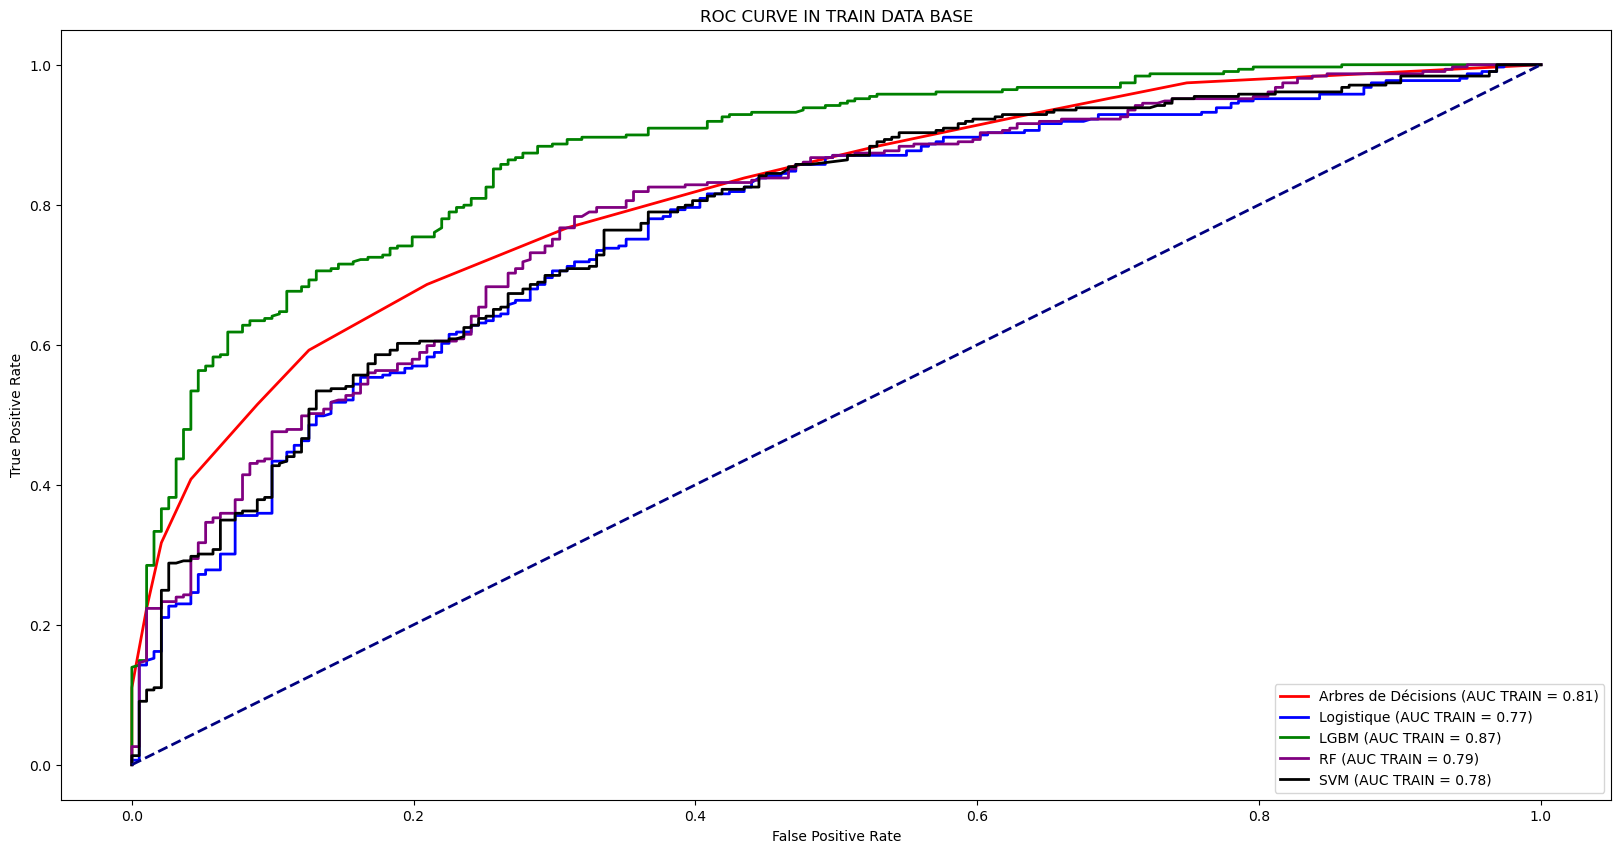

In [93]:
#ARBRE DE DECICISION : BASE TRAIN
# la ligne de code ci-dessous permet de tracer la courbe des Arbres de Décisions.
plt.plot(fpr_tree_train, tpr_tree_train, color='red', lw=lw, label='Arbres de Décisions (AUC TRAIN = %0.2f)' % roc_auc_tree_train)

#LOGISTIQUE : BASE TRAIN 
#La ligne trace la courbe de ROC du modèle de Régression Logistique
plt.plot(fpr_logit_train, tpr_logit_train, color='blue', lw=lw, label='Logistique (AUC TRAIN = %0.2f)' % roc_auc_logit_train)

#LGBM : BASE TRAIN 
#La ligne trace la courbe de ROC du modèle LGBM
plt.plot(fpr_lgbm_train, tpr_lgbm_train, color='green', lw=lw, label='LGBM (AUC TRAIN = %0.2f)' % roc_auc_lgbm_train)

#RF : BASE TRAIN 
#La ligne trace la courbe de ROC du modèle de Random Forest
plt.plot(fpr_rf_train, tpr_rf_train, color='purple', lw=lw, label='RF (AUC TRAIN = %0.2f)' % roc_auc_rf_train)

#SVM : BASE TRAIN 
#La ligne trace la courbe de ROC du modèle du SVM
plt.plot(fpr_svm_train, tpr_svm_train, color='black', lw=lw, label='SVM (AUC TRAIN = %0.2f)' % roc_auc_svm_train)

#ECHELLE DES GRAPHIQUES
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#TITRE DES GRAPHIQUES
plt.xlabel('False Positive Rate') #titre de l'axe x
plt.ylabel('True Positive Rate') #titre de l'axe y
plt.title('ROC CURVE IN TRAIN DATA BASE') #titre du graphique
plt.legend(loc="lower right") #affichage de la légende

#AFFICHAGE DU GRAPHIQUE
plt.show()

In [94]:
# On peut ici comparer les différents modèle sur la façon dont ils classifient la variable Y 
# Le meilleur modèle est celui qui est le plus souvent au dessus des autres 
# Ici nous remarquons clairement que pour la base train c'est le modèle LGBM
# qui est le modèle étant le plus souvent au dessus des autres et donc pouvant être considéré le meilleur
# vient ensuite les Arbres de décisions qui se distinguent du reste des autres modèles.
# Ici l'AUC du modèle de décision est le meilleur (81%) ainsi nous pouvons dire qu'il est le plus fiable
# Et il faut aussi regarder le taux d'erreur de chaque modèle
# ainsi les modèles ayant les taux d'erreur les plus bas sont dans un premier temps le modèle LGBM avec 26% 
# vient ensuite les modèles Logistique, SVM, Arbre de décision avec 27% de taux d'erreur

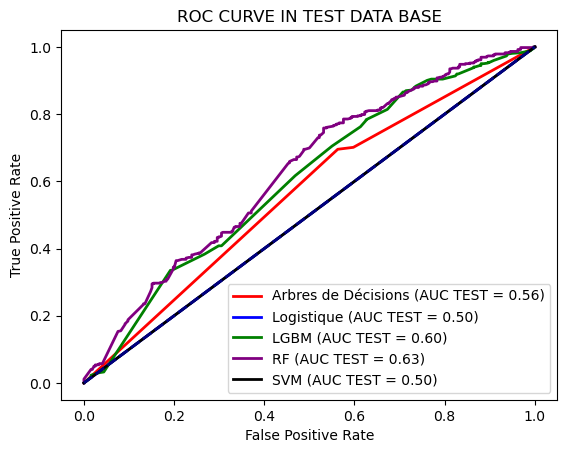

In [95]:
#ARBRE DE DECICISION : BASE TEST
# la ligne de code ci-dessous permet de tracer la courbe des Arbres de Décisions.
plt.plot(fpr_tree_test, tpr_tree_test, color='red', lw=lw, label='Arbres de Décisions (AUC TEST = %0.2f)' % roc_auc_tree_test)

#LOGISTIQUE : BASE TEST
#La ligne trace la courbe de ROC du modèle de Régression Logistique
plt.plot(fpr_logit_test, tpr_logit_test, color='blue', lw=lw, label='Logistique (AUC TEST = %0.2f)' % roc_auc_logit_test)

#LGBM : BASE TEST
#La ligne trace la courbe de ROC du modèle LGBM
plt.plot(fpr_lgbm_test, tpr_lgbm_test, color='green', lw=lw, label='LGBM (AUC TEST = %0.2f)' % roc_auc_lgbm_test)

#RF : BASE TEST
#La ligne trace la courbe de ROC du modèle de Random Forest
plt.plot(fpr_rf_test, tpr_rf_test, color='purple', lw=lw, label='RF (AUC TEST = %0.2f)' % roc_auc_rf_test)

#SVM : BASE TEST
#La ligne trace la courbe de ROC du modèle du SVM
plt.plot(fpr_svm_test, tpr_svm_test, color='black', lw=lw, label='SVM (AUC TEST = %0.2f)' % roc_auc_svm_test)


#ECHELLE DES GRAPHIQUES
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

#TITRE DES GRAPHIQUES
plt.xlabel('False Positive Rate') #titre de l'axe x
plt.ylabel('True Positive Rate') #titre de l'axe y
plt.title('ROC CURVE IN TEST DATA BASE') #titre du graphique
plt.legend(loc="lower right") #affichage de la légende

#AFFICHAGE DU GRAPHIQUE
plt.show()

In [96]:
# Lorsqu'on fait la comparaison sur la base test nous remarquons que c'est le modèle RF qui est au dessus des autres
# Ici nous remarquons clairement que pour la base test c'est le modèle Random Forest qui est le meilleur
# avec l'AUC du modèle RF qui est le meilleur aussi et nous pouvons donc dire qu'il est le plus fiable
# même si on peut relativiser car sa valeur est de 63% et donc ce situe en dessous du seuil de 70%
# Vient enseuite le modèle LGBM qui est fiable à 60% 
# Ces deux modèles ayant tout deux 38% de taux d'erreur et un taux de précision de 62%

In [97]:
########### CONCLUSION #############

# Ainsi pour conclure le modèle le plus pertinent sur la base train est le modèle LGBM en prenant en compte les différents
# éléments comme l'AUC, le taux de succès, le taux d'erreur et le taux de précision. 

# Par rapport à la base test c'est le modèle Random Forest qui est le plus fiable. 

# Mais lorsqu'on regarde le pourcentage de fiabilité il n'y a que 2% d'écart avec le modèle LGBM 
# et les autres éléments sont identitiques entre les 2 modèles. 

# Donc nous poouvons conclure que c'est le modèle LGBM qui est le meilleur modèle pour déterminer 
# si la carrière d'un basketteur durera plus de 5 ans ou non.  


#####################################

In [98]:
# - SCORING (avec le modèle retenu : LGBM)

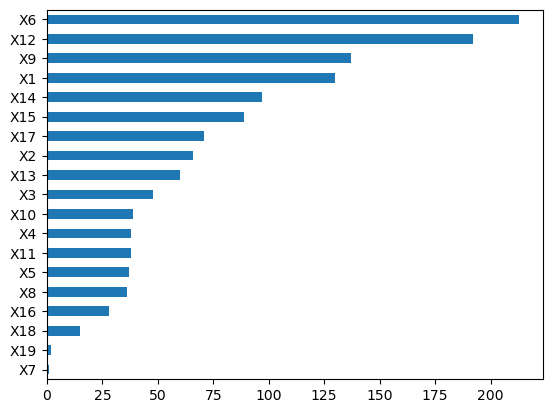

In [99]:
# But du code : l'attribut feature_importances_ du modèle de sklearn lgbm_modele permet de savoir l'importance des variables.
# En d'autres termes, nous pourrions connaître la contribution de chaque variable dans l'évaluation de la réponse Y (1 : crédit octroyé vs 0 crédit refusé).
feat_importances = pd.Series(lgbm_modele.feature_importances_, index = features)

# Trier l'importance par ordre décroissant.
feat_importances = feat_importances.sort_values(ascending=True)

# Afficher le graphique.
feat_importances.plot(kind='barh')

#AFFICHAGE DU GRAPHIQUE
plt.show()

In [100]:
# Conclusion : 
# Le Pourcentage de tirs realisees.(X6),
# le Pourcentage de Lancers francs (X12), 
# le Match jouee. (X9),
# sont les informations les plus pertinentes qui seront utilisées par l'équipe sur le joueur.

In [101]:
#A - Reponse du modele base train

# Generate test predictions : le modèle donnant comme réponse 1 (Y=1) pour les joueurs qui auront +5 ans de carrière et 0 sinon (Y=0).
y_pred = lgbm_modele.predict(db_train[features])

#Affichage de la réponse du modèle des 5 premiers individus
y_pred[:5]

array([1., 1., 1., 1., 1.])

In [102]:
# B - Score du modele

# Generate test predictions : le modèle donnant comme réponse la probabilité que Y = 1, donc, la probabilité que le joueur ai +5 ans de carrière
y_proba_pred = lgbm_modele.predict_proba(db_train[features])[:, 1]

#Affichage du score des 5 premiers individus
y_proba_pred[:5]

array([0.72250515, 0.51008766, 0.52807561, 0.78959305, 0.70287579])

In [103]:
# output_train contient l'identifiant de chaque joueur de la base train. Et pour chaque client, 
# la variable Y, le résultat du modèle (REPONSE_lgbm) et le score (SCORE_lgbm) est renseignée.

output_train = pd.DataFrame({ 'Id': db_train.index,
                                'Y' : db_train.Y,
                                'REPONSE_lgbm': y_pred,
                                'SCORE_lgbm': y_proba_pred
                       })

# Affichage des premiers joueurs 
output_train.head()

,Id,Y,REPONSE_lgbm,SCORE_lgbm
Id,,,,
Mark Alarie,Mark Alarie,1.0,1.0,0.722505
Josh Richardson,Josh Richardson,0.0,1.0,0.510088
Bobby Jones,Bobby Jones,0.0,1.0,0.528076
Jay Vincent,Jay Vincent,1.0,1.0,0.789593
D.J. Augustin,D.J. Augustin,1.0,1.0,0.702876


In [104]:
# Le rating représenté par la variable RATING_lgbm est obtenu en découpant le score (SCORE_lgbm). 
# En d’autres termes, on transforme la variable SCORE_lgbm en variable qualitative (groupe).
# Ainsi, les clients de rating A+ ont au minimum 60% de chance de faire une carrière de +5 ans.

output_train['RATING_lgbm'] = pd.cut(output_train['SCORE_lgbm'], 
                                  bins=[0, 0.4, 0.50, 0.6, float('Inf')], 
                                  labels=['C', 'B', 'A', 'A+'])

# Affichage des premiers clients
output_train.head()

,Id,Y,REPONSE_lgbm,SCORE_lgbm,RATING_lgbm
Id,,,,,
Mark Alarie,Mark Alarie,1.0,1.0,0.722505,A+
Josh Richardson,Josh Richardson,0.0,1.0,0.510088,A
Bobby Jones,Bobby Jones,0.0,1.0,0.528076,A
Jay Vincent,Jay Vincent,1.0,1.0,0.789593,A+
D.J. Augustin,D.J. Augustin,1.0,1.0,0.702876,A+


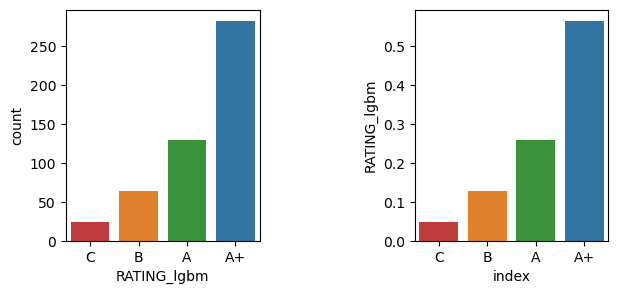

In [105]:
# But du code : Analyse descriptive de la variable RATING_lgbm

plt.figure(figsize=(7,3))

plt.subplots_adjust(wspace = 0.8)

couleurs = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4"]

plt.subplot(1,2,1)

sns.countplot(data = output_train, x = 'RATING_lgbm', palette = couleurs)

plt.subplot(1,2,2)
prop_df = (output_train['RATING_lgbm']
           .value_counts(normalize=True)
           .reset_index())

sns.barplot(x='index', y='RATING_lgbm', data=prop_df, palette = couleurs)

plt.show()

In [106]:
# But du code : le but est d'ajouter les variables descriptives des joueurs de la table output_train.
# En d'autre terme, on ajoute dans la base output_train, les variables X du joueur.

# Pour rappel, dataset contient les données du fichier excel importé sous Python.
# L'opération merge sélectionne les variables X (contenu dans cols_to_use) de la base dataset. 
# Ensuite, elle ajoute ces variables correspondantes à chaque joueur de la base output_train.

cols_to_use = dataset.columns.difference(output_train.columns)

output_train = output_train.merge(dataset[cols_to_use], how="inner", left_index=True, right_index=True)


output_train.head()

,Id,Y,REPONSE_lgbm,SCORE_lgbm,RATING_lgbm,X1,X10,X11,X12,X13,...,X18,X19,X2,X3,X4,X5,X6,X7,X8,X9
Id,,,,,,,,,,,,,,,,,,,,,
A.J. English,A.J. English,0.0,1.0,0.628246,A+,9.7,8.2,1.6,70.7,0.4,...,1.6,0.2,20.6,8.8,2.2,3.6,43.9,0.0,0.4,70
Aaron Brooks,Aaron Brooks,1.0,1.0,0.607698,A+,33.0,4.4,0.8,85.7,0.3,...,0.9,0.1,11.9,5.2,1.0,1.8,41.3,0.7,2.1,51
Acie Earl,Acie Earl,0.0,1.0,0.617160,A+,0.0,5.0,1.5,67.5,0.3,...,1.0,0.7,15.5,5.5,2.2,2.0,40.6,0.0,0.0,74
Adreian Payne,Adreian Payne,0.0,1.0,0.506456,A,11.1,6.9,0.9,65.2,0.6,...,1.4,0.3,23.1,6.7,1.4,2.8,41.4,0.0,0.3,32
Al Thornton,Al Thornton,0.0,1.0,0.679406,A+,33.1,11.0,2.7,74.3,0.6,...,1.6,0.5,27.3,12.7,3.6,4.7,42.9,0.5,1.6,79


In [107]:
# Analyse du rating

np.round(100*pd.crosstab(output_train.X9, output_train.RATING_lgbm, normalize='all'))

RATING_lgbm,C,B,A,A+
X9,,,,
11,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0
...,...,...,...,...
78,0.0,0.0,0.0,2.0
79,0.0,0.0,0.0,4.0
80,0.0,0.0,0.0,3.0


In [108]:
# On voit notamment qu'il ya 3 joueurs notés A+ et 1 joueurs noté B dans ceux qui ont plus de 82 matchs 

In [109]:
np.round(100*pd.crosstab(output_train.X12, output_train.RATING_lgbm, normalize='index'))

RATING_lgbm,C,B,A,A+
X12,,,,
28.6,0.0,0.0,100.0,0.0
33.3,0.0,0.0,100.0,0.0
35.0,0.0,0.0,100.0,0.0
37.5,0.0,100.0,0.0,0.0
38.4,0.0,0.0,100.0,0.0
...,...,...,...,...
89.5,0.0,100.0,0.0,0.0
90.0,0.0,0.0,0.0,100.0
90.9,0.0,0.0,0.0,100.0


In [110]:
pd.pivot_table(output_train[['RATING_lgbm','X9','X6']], index='RATING_lgbm', aggfunc='mean')

,X6,X9
RATING_lgbm,,
C,36.575000,39.000000
B,38.395775,43.830986
A,43.504545,49.720779
A+,45.951163,69.558140


In [111]:
# Plus le pourcentage de tir réalisé est élevé
# et plus le nombre de match est élevé plus le joueur à de chance de faire une carrière de plus de 5 ans.

# Ainsi on a pu créer des groupes de clients avec le scoring représentant la possibilité
# qu'ils fassent une carrière de +5 ans ou non.

In [112]:
#A - Reponse du modele base test

# Generate test predictions : le modèle donnant comme réponse 1 (Y=1) pour les joueurs qui auront +5 ans de carrière et 0 sinon (Y=0).
y_pred = lgbm_modele.predict(db_test[features])

#Affichage de la réponse du modèle des 5 premiers individus
y_pred[:5]

array([1., 1., 1., 1., 1.])

In [113]:
# B - Score du modele

# Generate test predictions : le modèle donnant comme réponse la probabilité que Y = 1, donc, la probabilité que le joueur joue +5 ans.
y_proba_pred = lgbm_modele.predict_proba(db_test[features])[:, 1]

#Affichage du score des 5 premiers individus
y_proba_pred[:5]

array([0.74523836, 0.71480503, 0.74011959, 0.74523836, 0.7411579 ])

In [114]:
# output_test contient l'identifiant de chaque joueur de la base test. Et pour chaque joueur, 
# la variable Y, le résultat du modèle (REPONSE_lgbm) et le score (SCORE_lgbm) est renseignée.

output_test = pd.DataFrame({ 'Id': db_test.index,
                                'Y' : db_test.Y,
                                'REPONSE_lgbm': y_pred,
                                'SCORE_lgbm': y_proba_pred
                       })

# Affichage des premiers joueurs 
output_test.head()

,Id,Y,REPONSE_lgbm,SCORE_lgbm
Id,,,,
Ronald Dupree,Ronald Dupree,1,1.0,0.745238
Tony Dumas,Tony Dumas,0,1.0,0.714805
Corey Brewer,Corey Brewer,1,1.0,0.740120
Sidney Green,Sidney Green,1,1.0,0.745238
Chris Paul,Chris Paul,1,1.0,0.741158


In [115]:
# Le rating représenté par la variable RATING_lgbm est obtenu en découpant le score (SCORE_lgbm). 
# En d’autres termes, on transforme la variable SCORE_lgbm en variable qualitative (groupe).
# Ainsi, les clients de rating A+ ont au minimum 60% de chance de faire une carrière de +5 ans.

output_test['RATING_lgbm'] = pd.cut(output_test['SCORE_lgbm'], 
                                  bins=[0, 0.4, 0.50, 0.6, float('Inf')], 
                                  labels=['C', 'B', 'A', 'A+'])

# Affichage des premiers clients
output_test.head()

,Id,Y,REPONSE_lgbm,SCORE_lgbm,RATING_lgbm
Id,,,,,
Ronald Dupree,Ronald Dupree,1,1.0,0.745238,A+
Tony Dumas,Tony Dumas,0,1.0,0.714805,A+
Corey Brewer,Corey Brewer,1,1.0,0.740120,A+
Sidney Green,Sidney Green,1,1.0,0.745238,A+
Chris Paul,Chris Paul,1,1.0,0.741158,A+


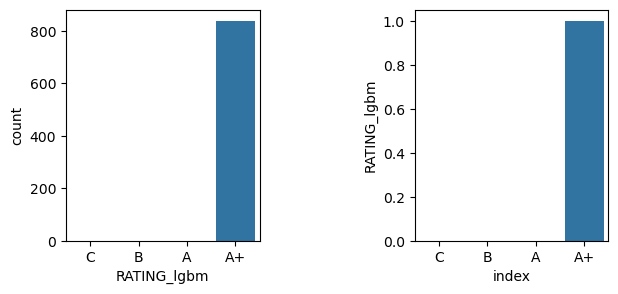

In [116]:
# But du code : Analyse descriptive de la variable RATING_lgbm

plt.figure(figsize=(7,3))

plt.subplots_adjust(wspace = 0.8)

couleurs = ["#d62728", "#ff7f0e", "#2ca02c", "#1f77b4"]

plt.subplot(1,2,1)

sns.countplot(data = output_test, x = 'RATING_lgbm', palette = couleurs)

plt.subplot(1,2,2)
prop_df = (output_test['RATING_lgbm']
           .value_counts(normalize=True)
           .reset_index())

sns.barplot(x='index', y='RATING_lgbm', data=prop_df, palette = couleurs)

plt.show()

In [117]:
# But du code : le but est d'ajouter les variables descriptives des joueurs de la table output_train.
# En d'autre terme, on ajoute dans la base output_train, les variables X du joueur.

# Pour rappel, dataset contient les données du fichier excel importé sous Python.
# L'opération merge sélectionne les variables X (contenu dans cols_to_use) de la base dataset. 
# Ensuite, elle ajoute ces variables correspondantes à chaque joueur de la base output_train.

cols_to_use = dataset.columns.difference(output_test.columns)

output_test = output_test.merge(dataset[cols_to_use], how="inner", left_index=True, right_index=True)


output_test.head()

,Id,Y,REPONSE_lgbm,SCORE_lgbm,RATING_lgbm,X1,X10,X11,X12,X13,...,X18,X19,X2,X3,X4,X5,X6,X7,X8,X9
Id,,,,,,,,,,,,,,,,,,,,,
A.C. Green,A.C. Green,1,1.0,0.745238,A+,16.7,4.7,1.2,61.1,0.6,...,1.2,0.6,18.8,6.4,2.0,2.5,53.9,0.0,0.1,82
A.J. Price,A.J. Price,1,1.0,0.741158,A+,34.5,6.3,1.1,80.0,0.6,...,1.1,0.1,15.4,7.3,1.3,2.6,41.0,1.1,3.1,56
Aaron Gordon,Aaron Gordon,0,1.0,0.742245,A+,27.1,4.4,0.9,72.1,0.5,...,0.8,0.5,17.0,5.2,1.3,2.0,44.7,0.3,1.0,47
Aaron Gray,Aaron Gray,1,1.0,0.731308,A+,0.0,3.3,0.9,56.6,0.3,...,0.9,0.3,10.0,4.3,1.6,1.7,50.5,0.0,0.0,61
Aaron McKie,Aaron McKie,1,1.0,0.742245,A+,39.3,5.8,1.1,68.5,0.8,...,0.9,0.4,18.4,6.5,1.6,2.6,44.4,0.2,0.6,45


In [119]:
# Analyse du rating

np.round(100*pd.crosstab(output_test.X9, output_test.RATING_lgbm, normalize='all'))

RATING_lgbm,A+
X9,
11,0.0
12,0.0
14,0.0
15,0.0
18,0.0
...,...
78,5.0
79,3.0
80,4.0


In [120]:
pd.pivot_table(output_test[['RATING_lgbm','X9','X6']], index='RATING_lgbm', aggfunc='mean')

,X6,X9
RATING_lgbm,,
A+,44.225723,60.214362


In [125]:
with pd. ExcelWriter(/Users/robertomaillot/Documents/M2/Big data/Projet/EXTRACT_PROJECT_4.xlsx) as writer:
    output_train.to_excel(writer, sheet_name = 'train')
    output_test.to_excel(writer, sheet_name = 'test')

SyntaxError: invalid syntax (2823262395.py, line 1)

AttributeError: module 'pandas' has no attribute 'Dataframe'